In [13]:
import numpy
import matplotlib.pyplot as pyplot
from scipy import signal
from scipy.fft import fft, fftfreq
pyplot.rcParams['figure.dpi'] = 100

Criação de uma onda quadrada:

In [2]:
SIGNAL_LENGTH_SECONDS = 50
SIGNAL_SAMPLING_RATE  = 96000
SIGNAL_SAMPLE_COUNT   = SIGNAL_SAMPLING_RATE * SIGNAL_LENGTH_SECONDS

SIGNAL_FREQUENCY      = 1000
SIGNAL_AMPLITUDE      = 1

square_wave_time_space      = numpy.linspace(0, SIGNAL_LENGTH_SECONDS, SIGNAL_SAMPLE_COUNT, endpoint=False)
square_wave_normalized_amplitude_space = SIGNAL_AMPLITUDE * signal.square(2 * numpy.pi * SIGNAL_FREQUENCY * square_wave_time_space)
square_wave_amplitude_space = numpy.int16((square_wave_normalized_amplitude_space / square_wave_normalized_amplitude_space.max()) * 32767)

Plot da onda criada:

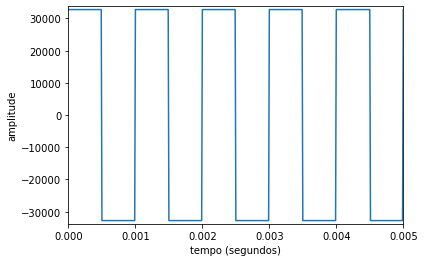

In [3]:
square_wave_figure = pyplot.figure()

pyplot.plot(square_wave_time_space, square_wave_amplitude_space)
pyplot.axis((0, 5 / SIGNAL_FREQUENCY, -32767 - 1000, 32767 + 1000))
pyplot.xlabel('tempo (segundos)')
pyplot.ylabel('amplitude');

Aplicação da FFT na onda quadrada:
> O resultado é um array de números complexos

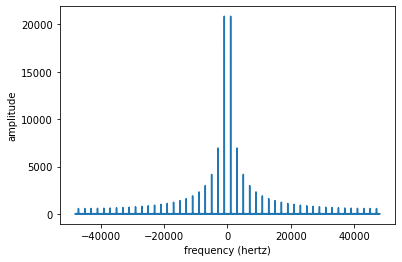

In [4]:
y_fft = fft(square_wave_amplitude_space) / SIGNAL_SAMPLE_COUNT
x_fft = fftfreq(SIGNAL_SAMPLE_COUNT, 1 / SIGNAL_SAMPLING_RATE)

pyplot.plot(x_fft, numpy.abs(y_fft))
pyplot.xlabel('frequency (hertz)')
pyplot.ylabel('amplitude');
pyplot.show()

Geração de uma senoide:

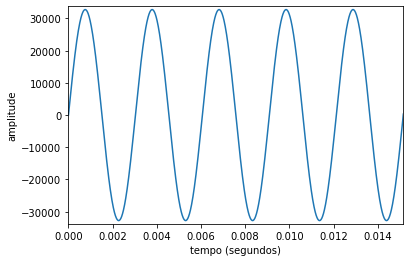

In [5]:
SIGNAL_LENGTH_SECONDS = 50
SIGNAL_SAMPLING_RATE  = 96000
SIGNAL_SAMPLE_COUNT   = SIGNAL_SAMPLING_RATE * SIGNAL_LENGTH_SECONDS

SIGNAL_FREQUENCY      = 330
SIGNAL_AMPLITUDE      = 1

sine_wave_time_space = numpy.linspace(0, SIGNAL_LENGTH_SECONDS, SIGNAL_SAMPLE_COUNT, endpoint=False)
sine_wave_normalized_amplitude_space = SIGNAL_AMPLITUDE * numpy.sin(2 * numpy.pi * SIGNAL_FREQUENCY * square_wave_time_space)
sine_wave_amplitude_space = numpy.int16((sine_wave_normalized_amplitude_space / sine_wave_normalized_amplitude_space.max()) * 32767)

sine_wave_figure = pyplot.figure()

pyplot.plot(sine_wave_time_space, sine_wave_amplitude_space)
pyplot.axis((0, 5 / SIGNAL_FREQUENCY, -32767 - 1000, 32767 + 1000))
pyplot.xlabel('tempo (segundos)')
pyplot.ylabel('amplitude');

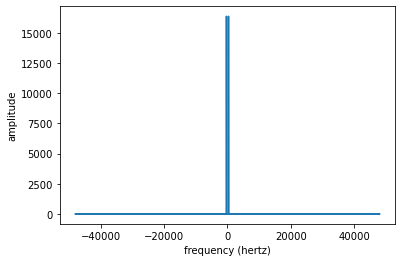

In [6]:
y_fft = fft(sine_wave_amplitude_space) / SIGNAL_SAMPLE_COUNT
x_fft = fftfreq(SIGNAL_SAMPLE_COUNT, 1 / SIGNAL_SAMPLING_RATE)

pyplot.plot(x_fft, numpy.abs(y_fft))
pyplot.xlabel('frequency (hertz)')
pyplot.ylabel('amplitude');
pyplot.show()

In [7]:
  # left-channel, High-Pass, 1kHz, fs=96kHz, q=0.7


In [8]:



# filtered_amplitude_space = [apply_filter(item) for item in sine_wave_amplitude_space]

# # filtered_amplitude_space
# pyplot.plot(sine_wave_time_space, filtered_amplitude_space)
# pyplot.plot(sine_wave_time_space, sine_wave_amplitude_space)

# pyplot.axis((0, 5 / SIGNAL_FREQUENCY, -32767 - 1000, 32767 + 1000))
# pyplot.xlabel('tempo (segundos)')
# pyplot.ylabel('amplitude');






In [9]:
# y_fft = fft(filtered_amplitude_space) / SIGNAL_SAMPLE_COUNT
# x_fft = fftfreq(SIGNAL_SAMPLE_COUNT, 1 / SIGNAL_SAMPLING_RATE)

# pyplot.plot(x_fft, numpy.abs(y_fft))
# pyplot.xlabel('frequency (hertz)')
# pyplot.ylabel('amplitude');
# pyplot.show()

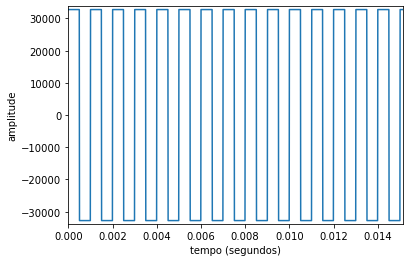

In [10]:
noise = numpy.random.normal(0,1,SIGNAL_SAMPLE_COUNT)

square_with_noise = noise * 0 + square_wave_amplitude_space

pyplot.plot(sine_wave_time_space, square_with_noise)

pyplot.axis((0, 5 / SIGNAL_FREQUENCY, -32767 - 1000, 32767 + 1000))
pyplot.xlabel('tempo (segundos)')
pyplot.ylabel('amplitude');

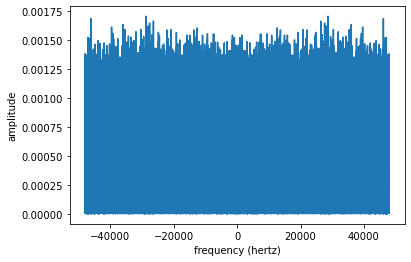

In [11]:
y_fft = fft(noise) / SIGNAL_SAMPLE_COUNT
x_fft = fftfreq(SIGNAL_SAMPLE_COUNT, 1 / SIGNAL_SAMPLING_RATE)

pyplot.plot(x_fft, numpy.abs(y_fft))
# pyplot.axis((0, 400, -32767 - 1000, 32767 + 1000))
pyplot.xlabel('frequency (hertz)')
pyplot.ylabel('amplitude');
pyplot.show()

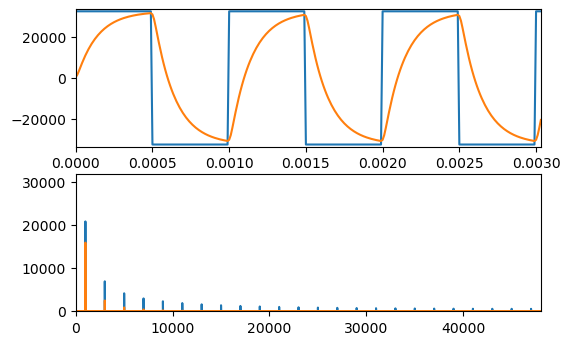

In [14]:
lin_z1 = 0
lin_z2 = 0
lout_z1 = 0
lout_z2 = 0
l_a0 = 0.011050373933114971
l_a1 = 0.022100747866229942
l_a2 = 0.011050373933114971

l_b1 = -1.3368583644305965
l_b2 = 0.3810598601630564

def apply_filter (inSample):
    global lin_z1
    global lin_z2
    global lout_z1
    global lout_z2
    global l_a0
    global l_a1
    global l_a2
    global l_b1
    global l_b2

    inSampleF = float(inSample)
            
    outSampleF = l_a0 * inSampleF + l_a1 * lin_z1 + l_a2 * lin_z2 - l_b1 * lout_z1 - l_b2 * lout_z2
    
    
    lin_z2 = lin_z1
    lin_z1 = inSampleF
    lout_z2 = lout_z1
    lout_z1 = outSampleF

    return int(outSampleF);

    

filtered_amplitude_space = [apply_filter(item) for item in square_with_noise]
fig, axs = pyplot.subplots(2)

# filtered_amplitude_space
axs[0].plot(sine_wave_time_space, square_with_noise)
axs[0].plot(sine_wave_time_space, filtered_amplitude_space)

axs[0].axis((0, 1 / SIGNAL_FREQUENCY, -32767 - 1000, 32767 + 1000))
# pyplot.xlabel('tempo (segundos)')
# pyplot.ylabel('amplitude');
x_fft = fftfreq(SIGNAL_SAMPLE_COUNT, 1 / SIGNAL_SAMPLING_RATE)
y_fft = fft(square_with_noise) / SIGNAL_SAMPLE_COUNT
axs[1].plot(x_fft, numpy.abs(y_fft))
y_fft = fft(filtered_amplitude_space) / SIGNAL_SAMPLE_COUNT
axs[1].plot(x_fft, numpy.abs(y_fft))





# # x_fft = fftfreq(SIGNAL_SAMPLE_COUNT, 1 / SIGNAL_SAMPLING_RATE)


axs[1].axis((0, SIGNAL_SAMPLING_RATE / 2, 0, max(abs(y_fft)) * 2))
# # pyplot.xlabel('frequency (hertz)')
# # pyplot.ylabel('amplitude');
# pyplot.rcParams['figure.figsize'] = [10, 5]
pyplot.show()